In [219]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [153]:
df=pd.read_csv('../resources/Excel_sheets/heart.csv')
df.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1


In [154]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [155]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [156]:
df.Age.describe()

count    918.000000
mean      53.510893
std        9.432617
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: Age, dtype: float64

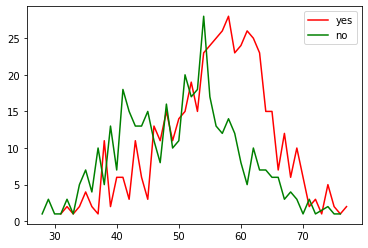

In [157]:
def plot_age(df):
    dy=df[df.HeartDisease==1].Age.value_counts(sort=False)
    dn=df[df.HeartDisease==0].Age.value_counts(sort=False)
    plt.plot(dy.index,dy.values,color='r',label='yes')
    plt.plot(dn.index,dn.values,color='g',label='no')
    plt.legend()
    plt.show()
plot_age(df)

In [158]:
df.Sex.unique()

array(['M', 'F'], dtype=object)

In [159]:
df.groupby('Sex')['HeartDisease'].value_counts()

Sex  HeartDisease
F    0               143
     1                50
M    1               458
     0               267
Name: HeartDisease, dtype: int64

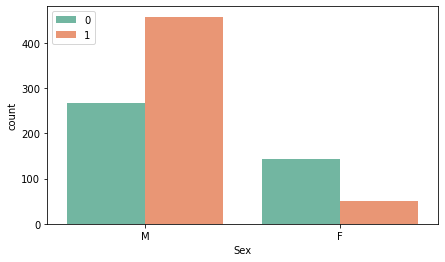

In [160]:
plt.figure(figsize=(7,4))
sns.countplot(x='Sex',hue='HeartDisease',palette='Set2',data=df)
plt.legend(loc='upper left')

In [161]:
df.Sex=df.Sex.apply(lambda x: 1 if x=='M' else 0 )

In [162]:
df.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,N,1.0,Flat,1


<AxesSubplot:>

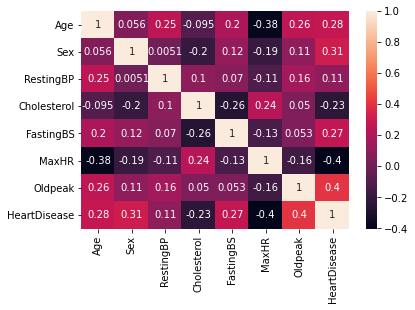

In [163]:
sns.heatmap(df.corr(),annot=True)

In [164]:
df.Age.describe()

count    918.000000
mean      53.510893
std        9.432617
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: Age, dtype: float64

In [165]:
df.ChestPainType.unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [166]:
df.ChestPainType.value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [167]:
df.groupby('ChestPainType').HeartDisease.value_counts()

ChestPainType  HeartDisease
ASY            1               392
               0               104
ATA            0               149
               1                24
NAP            0               131
               1                72
TA             0                26
               1                20
Name: HeartDisease, dtype: int64

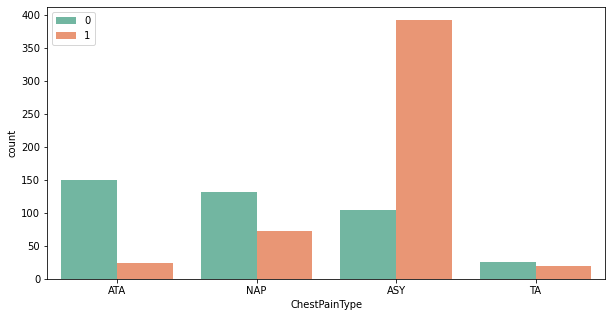

In [168]:
plt.figure(figsize=(10,5))
sns.countplot(x='ChestPainType',hue='HeartDisease',palette='Set2',data=df)
plt.legend(loc='upper left')

if the ChestPainType is ASY there it is more likely to have Heart disease

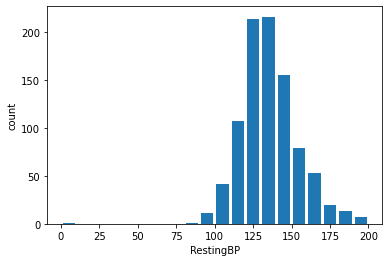

In [169]:
plt.hist(df.RestingBP,bins=20,rwidth=0.8)
plt.ylabel('count')
plt.xlabel('RestingBP')
plt.show()

In [170]:
df.RestingBP.describe()

count    918.000000
mean     132.396514
std       18.514154
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: RestingBP, dtype: float64

In [171]:
df[df.RestingBP<df.RestingBP.quantile(0.01)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
227,38,1,ASY,92,117,0,Normal,134,Y,2.5,Flat,1
314,53,1,ASY,80,0,0,Normal,141,Y,2.0,Down,0
449,55,1,NAP,0,0,0,Normal,155,N,1.5,Flat,1
692,39,0,NAP,94,199,0,Normal,179,N,0.0,Up,0
832,51,1,NAP,94,227,0,Normal,154,Y,0.0,Up,0


In [172]:
df=df.drop(df[df.RestingBP==0].index)

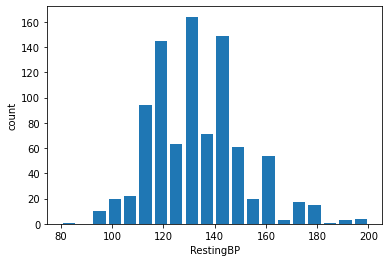

In [173]:
plt.hist(df.RestingBP,bins=20,rwidth=0.8)
plt.ylabel('count')
plt.xlabel('RestingBP')
plt.show()

In [174]:
upper_limit=df.RestingBP.mean()+3*df.RestingBP.std()
lower_limit=df.RestingBP.mean()-3*df.RestingBP.std()
lower_limit,upper_limit

(78.54164782209048, 186.54014061847656)

In [175]:
df1=df[df.RestingBP<upper_limit]

In [176]:
df.shape[0]-df1.shape[0]

7

In [177]:
df1.RestingBP.describe()

count    910.000000
mean     132.052747
std       17.177564
min       80.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      185.000000
Name: RestingBP, dtype: float64

In [178]:
df1.Cholesterol.describe()

count    910.000000
mean     199.121978
std      109.144788
min        0.000000
25%      174.250000
50%      223.000000
75%      267.000000
max      603.000000
Name: Cholesterol, dtype: float64

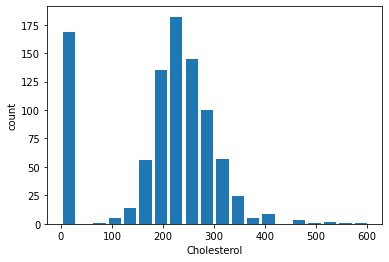

In [179]:
plt.hist(df1.Cholesterol,bins=20,rwidth=0.8)
plt.ylabel('count')
plt.xlabel('Cholesterol')
plt.show()

In [180]:
d=df1[df1.Cholesterol==0]
d.HeartDisease.value_counts()

1    149
0     20
Name: HeartDisease, dtype: int64

In [181]:
df1[df1.Cholesterol>450].HeartDisease.value_counts()

1    5
0    3
Name: HeartDisease, dtype: int64

In [182]:
Q1,Q3=df1.Cholesterol.quantile([0.25,0.75])
IQR =Q3-Q1
IQR

92.75

In [183]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit,upper_limit

(35.125, 406.125)

In [184]:
df2=df1[(df1.Cholesterol>lower_limit) & (df1.Cholesterol<upper_limit)]

In [185]:
df1.shape[0]-df2.shape[0]

181

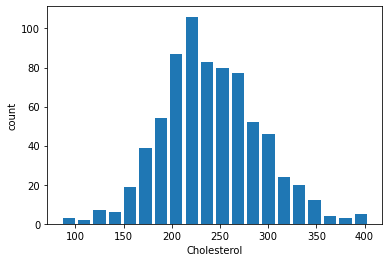

In [186]:
plt.hist(df2.Cholesterol,bins=20,rwidth=0.8)
plt.ylabel('count')
plt.xlabel('Cholesterol')
plt.show()

In [187]:
df2.FastingBS.unique()

array([0, 1], dtype=int64)

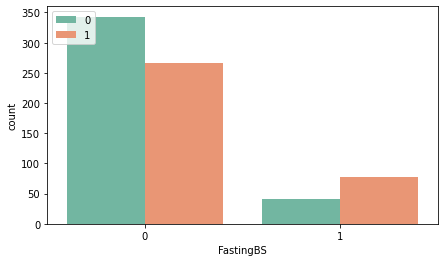

In [188]:
plt.figure(figsize=(7,4))
sns.countplot(x='FastingBS',hue='HeartDisease',palette='Set2',data=df2)
plt.legend(loc='upper left')

In [189]:
df2.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,N,1.0,Flat,1


In [190]:
df2.RestingECG.unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

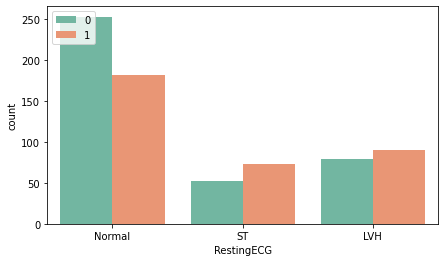

In [191]:
plt.figure(figsize=(7,4))
sns.countplot(x='RestingECG',hue='HeartDisease',palette='Set2',data=df2)
plt.legend(loc='upper left')

In [192]:
df2.MaxHR.describe()

count    729.000000
mean     140.224966
std       24.473722
min       71.000000
25%      122.000000
50%      140.000000
75%      160.000000
max      202.000000
Name: MaxHR, dtype: float64

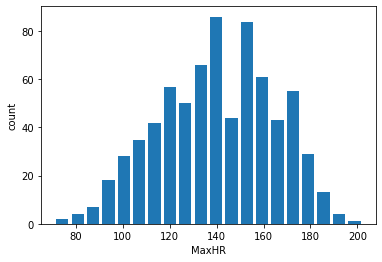

In [193]:
plt.hist(df2.MaxHR,bins=20,rwidth=0.8)
plt.ylabel('count')
plt.xlabel('MaxHR')
plt.show()

In [197]:
df2.ExerciseAngina.unique()

array(['N', 'Y'], dtype=object)

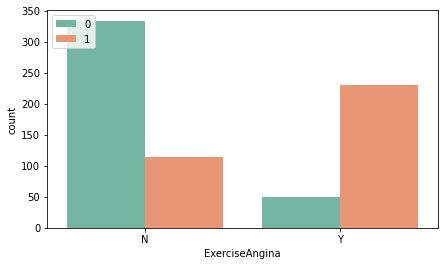

In [198]:
plt.figure(figsize=(7,4))
sns.countplot(x='ExerciseAngina',hue='HeartDisease',palette='Set2',data=df2)
plt.legend(loc='upper left')

In [200]:
df2.ExerciseAngina=df2.ExerciseAngina.apply(lambda x: 0 if x=='N' else 1)

In [201]:
df2.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,1,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,1,1.0,Flat,1


In [202]:
df2.Oldpeak.describe()

count    729.000000
mean       0.896159
std        1.066903
min       -0.100000
25%        0.000000
50%        0.500000
75%        1.500000
max        6.200000
Name: Oldpeak, dtype: float64

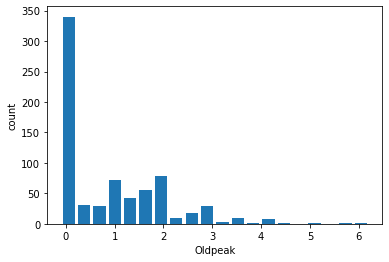

In [203]:
plt.hist(df2.Oldpeak,bins=20,rwidth=0.8)
plt.ylabel('count')
plt.xlabel('Oldpeak')
plt.show()

In [213]:

z=df2.Oldpeak.quantile(.98)
df3=df2[df2.Oldpeak<z]

In [214]:
df2.shape[0]-df3.shape[0]

17

In [216]:
df3.ST_Slope.unique()

array(['Up', 'Flat', 'Down'], dtype=object)

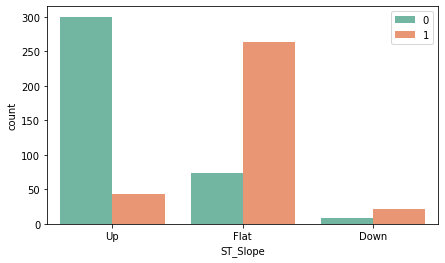

In [218]:
plt.figure(figsize=(7,4))
sns.countplot(x='ST_Slope',hue='HeartDisease',palette='Set2',data=df3)
plt.legend(loc='upper right')

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = df.copy()
X = data.iloc[:,0:13]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print 10 best features

In [221]:
df3.shape

(712, 12)

In [236]:
df4=df3.copy()

In [223]:
df4.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,1,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,1,1.0,Flat,1


In [235]:
lcpt= LabelEncoder()
lregc=LabelEncoder()
lsts=LabelEncoder()

In [237]:
df4.ChestPainType=lcpt.fit_transform(df4.ChestPainType)
df4.RestingECG=lregc.fit_transform(df4.RestingECG)
df4.ST_Slope=lsts.fit_transform(df4.ST_Slope)

In [238]:
df4.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,1,0.0,2,0
1,49,0,2,160,180,0,1,156,1,1.0,1,1
2,37,1,1,130,283,0,2,98,1,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,1,0.0,2,0


In [241]:
X=df4.drop('HeartDisease',axis=1)
y=df4.HeartDisease

In [270]:
sc = StandardScaler()
Xv = sc.fit_transform(X)

In [273]:
models = [LogisticRegression(max_iter=1000),DecisionTreeClassifier(criterion='entropy')
          ,RandomForestClassifier(max_features='log2'),SVC(C=10)]

score=[]
for model in models:
    score.append(cross_val_score(model,Xv,y).mean())

In [274]:
model_name=['Logistic Regression','Decision Tree','Random Forest','SVM']
model_stats=pd.DataFrame(index=model_name)
model_stats['Average score']=score
model_stats

,Average score
Logistic Regression,0.834108
Decision Tree,0.798995
Random Forest,0.856584
SVM,0.825667


## PCA

In [275]:
df5=df3.copy()

In [276]:
encoded_df=pd.get_dummies(df,drop_first=True)

In [277]:
encoded_df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,0,1,0,0,1,0,0,1
1,49,0,160,180,0,156,0,1.0,1,0,1,0,1,0,1,0
2,37,1,130,283,0,98,0,0.0,0,1,0,0,0,1,0,1
3,48,0,138,214,0,108,1,1.5,1,0,0,0,1,0,1,0
4,54,1,150,195,0,122,0,0.0,0,0,1,0,1,0,0,1


In [278]:
X=encoded_df.drop('HeartDisease',axis=1)
y=encoded_df.HeartDisease

In [286]:
sc = StandardScaler()
Xs = sc.fit_transform(X)

In [313]:
X_train,X_test,y_train,y_test=train_test_split(Xs,y,test_size=0.2,random_state=3)

In [314]:
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
logreg.score(X_test,y_test)

0.8532608695652174

## PCA

In [306]:
pca=PCA(0.95)  # argument : no => %imformation retain else n_components = no_of_columns_in_new
X_pca=pca.fit_transform(X)
X_pca.shape

(917, 2)

In [309]:
X_train_pca,X_test_pca,y_train_pca,y_test_pca=train_test_split(X_pca,y,test_size=0.2,random_state=3)

In [310]:
logreg=LogisticRegression()
logreg.fit(X_train_pca,y_train_pca)
logreg.score(X_test_pca,y_test_pca)

0.7010869565217391

# BAGGING

* over_fit :
   1. high varience ->  test error is high and large diff for diff train set
   2. train error is very low
* under_fit :
   1. high bias -> train error is high
   2. samll diff in test error for diff train set
* balanced_fit :
   1. low varience and low bias

In [304]:
from sklearn.ensemble import BaggingClassifier

In [315]:
svm=SVC()
svm.fit(X_train,y_train)
svm.score(X_test,y_test)

0.8695652173913043

In [321]:
bag_model_svm=BaggingClassifier(
    base_estimator=SVC(),
    n_estimators=100,
    max_samples=1.0,
    oob_score=True,
    random_state=0
)
bag_model_svm.fit(X_train,y_train)
bag_model_svm.oob_score_

0.8608458390177354

In [322]:
bag_model_svm.score(X_test,y_test)

0.875

In [327]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt.score(X_test,y_test)

0.7717391304347826

In [323]:
bag_model_dtc=BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=100,
    max_samples=1.0,
    oob_score=True,
    random_state=0
)
bag_model_dtc.fit(X_train,y_train)
bag_model_dtc.oob_score_

0.8458390177353342

In [326]:
bag_model_dtc.score(X_test,y_test)

0.8532608695652174